In [94]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, AncillaRegister, Parameter, Gate
from qiskit.quantum_info import Statevector, Operator
from qiskit.circuit.library import UnitaryGate
from scipy.linalg import polar
import numpy as np

Full 8x8 C²(U) matrix:
 [[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [-0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -0.  0.  0.]
 [ 0.  0.  0.  0. -0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]]


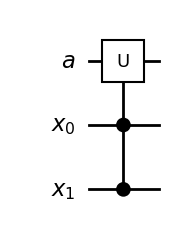

In [ ]:
# I don't have much coding experience, this course has been challenging for me...I'm gonna set n=2 for simplicity
def unitary_matrix(M):  # in case the input matrix is not unitary
    """
    Given an arbitrary 2x2 complex matrix M, return the closest unitary matrix U via polar decomposition.
    """
    if M.shape != (2, 2):
        raise ValueError("Input must be a 2x2 matrix.")
    
    # Use polar decomposition: M = U P where U is unitary and P is Hermitian PSD
    U, P = polar(M)
    return U
    
def cc_circuit(M): # Construct a double controlled circuit with the input matrix
    U_unitary = unitary_matrix(M)

    u_gate = UnitaryGate(U_unitary, label="U")
    cc_u_gate = u_gate.control(2)

    qr = QuantumRegister(size=2, name="x")
    ar = QuantumRegister(size=1, name="a")
    
    qc = QuantumCircuit(ar,qr, name="C^2U circuit") # Put the ancilla qubit on the first line so the output matrix looks more intuitive

    qc.append(cc_u_gate,[qr[1],qr[0],ar[0]]) 

    return qc 

M = np.array([[0, 1],   # Test with Pauli X matrix
              [1, 0]])

qc = cc_unitary_circuit(M)
full_U = np.round(np.real(Operator(qc).data)) # Read the effective operator matrix
print("Full 8x8 C²(U) matrix:\n", full_U)

qc.draw(output="mpl", style="bw")
